In [1]:
import os
from pathlib import Path
import sys
import os
import _pickle as pickle
import json
import copy 
import pandas
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import csv
import json
from collections import Counter
import statistics 

# Keystrokes

In [3]:
keyStrokes = []
for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        keyStrokes.append(len(dialogs[i]['loggedData']))
                    
                    
                except Exception as e: print(e)
                

In [6]:
print("Overall keystrokes in conversations: " + str(statistics.mean(keyStrokes)))

Overall keystrokes in conversations: 30.24542405366555


In [7]:
Set1 = []
Set2 = []
Set3 = []
Set4 = []
Set5 = []

for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['settingNumber'] == 1):
                        for i in range(1, len(dialogs)):
                            Set1.append(len(dialogs[i]['loggedData']))
                    
                    elif(data['settingNumber'] == 2):
                        for i in range(1, len(dialogs)):
                            Set2.append(len(dialogs[i]['loggedData']))
                    
                    elif(data['settingNumber'] == 3):
                        for i in range(1, len(dialogs)):
                            Set3.append(len(dialogs[i]['loggedData']))
                        
                    elif(data['settingNumber'] == 4):
                        for i in range(1, len(dialogs)):
                            Set4.append(len(dialogs[i]['loggedData']))
                    
                    else:
                        for i in range(1, len(dialogs)):
                            Set5.append(len(dialogs[i]['loggedData']))
 
                    
                    
                except Exception as e: print(e)

In [8]:
print("Setting 1 time taken: " + str(statistics.mean(Set1)))
print("Setting 2 time taken: " + str(statistics.mean(Set2)))
print("Setting 3 time taken: " + str(statistics.mean(Set3)))
print("Setting 4 time taken: " + str(statistics.mean(Set4)))
print("Setting 5 time taken: " + str(statistics.mean(Set5)))

Setting 1 time taken: 65.7275
Setting 2 time taken: 27.437204591492236
Setting 3 time taken: 21.391555285540704
Setting 4 time taken: 39.322641509433964
Setting 5 time taken: 29.553492484526966


## Setting 2

In [9]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 2"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(len(dialogs[i]['loggedData']))
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(len(dialogs[i]['loggedData']))
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [10]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 42.41630901287554
Finished conversations with 3 suggestion(s): 26.096638655462186
Finished conversations with 5 suggestion(s): 24.752475247524753


### Autofilled Suggestion

In [11]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 27.010344827586206
Finished conversations with 3 suggestion(s): 28.992125984251967
Finished conversations with 5 suggestion(s): 16.452651515151516


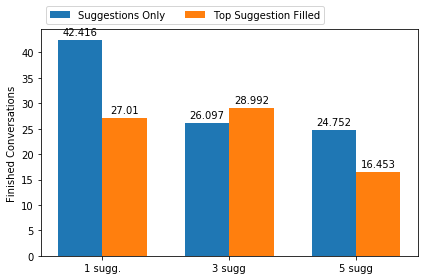

In [12]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 3

In [13]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 3"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(len(dialogs[i]['loggedData']))
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(len(dialogs[i]['loggedData']))
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [14]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 35.633466135458164
Finished conversations with 3 suggestion(s): 19.08777969018933
Finished conversations with 5 suggestion(s): 21.123853211009173


### Autofilled Suggestion


In [15]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 22.46189735614308
Finished conversations with 3 suggestion(s): 17.5
Finished conversations with 5 suggestion(s): 14.339171974522293


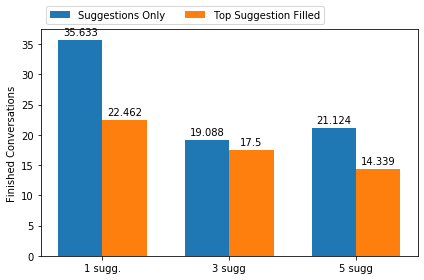

In [16]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 4

In [17]:
sugg1 = []
sugg3 = []
sugg5 = []

autoSugg1 = []
autoSugg3 = []
autoSugg5 = []


for root, dirs, files in os.walk("../clean/Setting 4"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                sugg3.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                sugg5.append(len(dialogs[i]['loggedData']))
                    
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 3):
                            for i in range(1, len(dialogs)):
                                autoSugg3.append(len(dialogs[i]['loggedData']))
                        
                        elif(data['suggestionsNumber'] == 5):
                            for i in range(1, len(dialogs)):
                                autoSugg5.append(len(dialogs[i]['loggedData']))
                    
                    
                except Exception as e: print(e)

### Suggestions Only

In [18]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(sugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(sugg5)))

Finished conversations with 1 suggestion(s): 47.91533180778032
Finished conversations with 3 suggestion(s): 42.77777777777778
Finished conversations with 5 suggestion(s): 46.78370786516854


### Autofilled Suggestion

In [19]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))
print("Finished conversations with 3 suggestion(s): " + str(statistics.mean(autoSugg3)))
print("Finished conversations with 5 suggestion(s): " + str(statistics.mean(autoSugg5)))

Finished conversations with 1 suggestion(s): 27.34417808219178
Finished conversations with 3 suggestion(s): 45.86351706036746
Finished conversations with 5 suggestion(s): 32.8970297029703


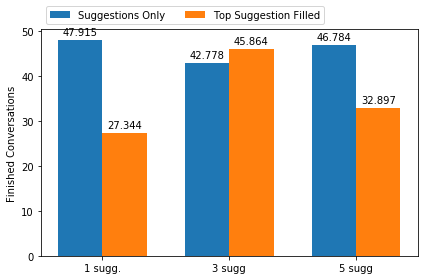

In [20]:
labels = ['1 sugg.', '3 sugg', '5 sugg']
suggMeans = [round(statistics.mean(sugg1), 3), round(statistics.mean(sugg3), 3), round(statistics.mean(sugg5), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3), round(statistics.mean(autoSugg3), 3), round(statistics.mean(autoSugg5), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Setting 5

In [21]:

sugg1 = []

autoSugg1 = []


for root, dirs, files in os.walk("../clean/Setting 5"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    
                    if(data['autoFilledSuggestion'] == 0):
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                sugg1.append(len(dialogs[i]['loggedData']))
                        
                       
                    else:
                        
                        if(data['suggestionsNumber'] == 1):
                            for i in range(1, len(dialogs)):
                                autoSugg1.append(len(dialogs[i]['loggedData']))
                    
                    
                except Exception as e: print(e)



### Suggestions Only

In [22]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(sugg1)))


Finished conversations with 1 suggestion(s): 32.36964980544747


### Autofilled Suggestion

In [23]:
print("Finished conversations with 1 suggestion(s): " + str(statistics.mean(autoSugg1)))


Finished conversations with 1 suggestion(s): 27.207455429497568


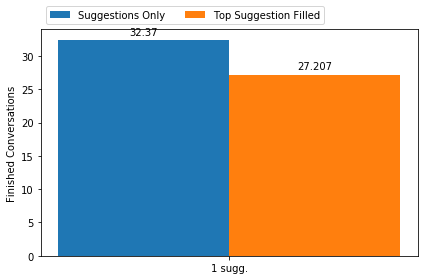

In [24]:
labels = ['1 sugg.']
suggMeans = [round(statistics.mean(sugg1), 3)]
sugFilledMeans = [round(statistics.mean(autoSugg1), 3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, suggMeans, width, label='Suggestions Only')
rects2 = ax.bar(x + width/2, sugFilledMeans, width, label='Top Suggestion Filled')


ax.set_ylabel('Finished Conversations')
#ax.set_title('Finished Conversations in Setting 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()